In [97]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [98]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [99]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [100]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
normalized_data = scaler.fit_transform(market_data_df)

In [101]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
market_data_normalized = pd.DataFrame(normalized_data, index=market_data_df.index, columns=market_data_df.columns)

# Display sample data
market_data_normalized.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [102]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    # 1. Create a KMeans model with the current number of clusters (k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    # 2. Fit the model to the scaled DataFrame 'market_data_normalized'
    kmeans.fit(market_data_normalized)
    # 3. Append the inertia value to the inertia_values list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = dict(zip(k_values, inertia_values))

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame({
    'k': k_values,
    'inertia': inertia_values
})

# Display the DataFrame
elbow_curve_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


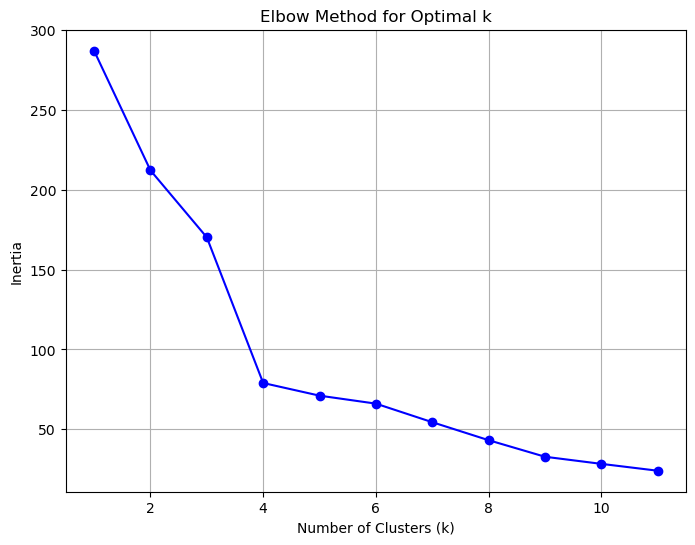

In [103]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_curve_df['k'], elbow_curve_df['inertia'], marker='o', linestyle='-', color='b')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 is the best value for `k` for the optimal clusters

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [104]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [105]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_normalized)

KMeans(n_clusters=4, random_state=42)

In [106]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(market_data_normalized)
# View the resulting array of cluster values.
cluster_labels

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [107]:
# Create a copy of the DataFrame
market_data_normalized_copy = market_data_normalized.copy()


In [108]:
# Add a new column to the DataFrame with the predicted clusters
market_data_normalized_copy['cluster'] = cluster_labels
# Display sample data
market_data_normalized_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


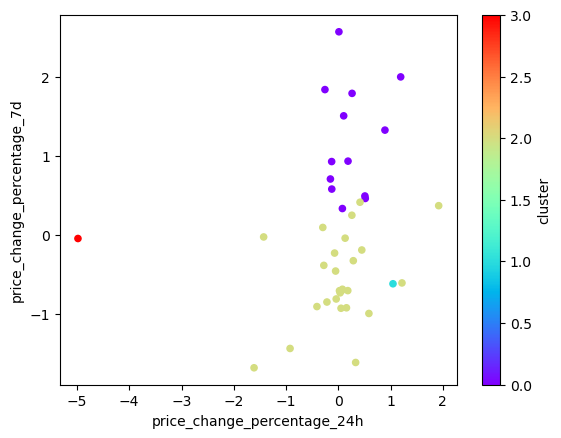

In [109]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

scatter = market_data_normalized_copy.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='cluster',
    colormap='rainbow',
)


### Optimize Clusters with Principal Component Analysis.

In [110]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [111]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_transformed_data = pca.fit_transform(market_data_normalized)

# View the first five rows of the DataFrame.
pca_df = pd.DataFrame(
    pca_transformed_data,
    index=market_data_normalized.index,
    columns=['PC1', 'PC2', 'PC3']
)
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [112]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each principal component:")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {ratio:.4f}")

Explained Variance Ratio for each principal component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is 0.8950 or 89.50%

In [113]:
# I don't understand this step because it was all done above

# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [114]:
# Create a list with the number of k-values to try (from 1 to 11)
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Loop through each k-value to compute inertia
for k in k_values:
    # 1. Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # 2. Fit the model to the data using the PCA DataFrame
    kmeans.fit(pca_df)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = dict(zip(k_values, inertia_values))

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame({
    'k': k_values,
    'inertia': inertia_values
})

# Display the DataFrame
elbow_curve_df


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


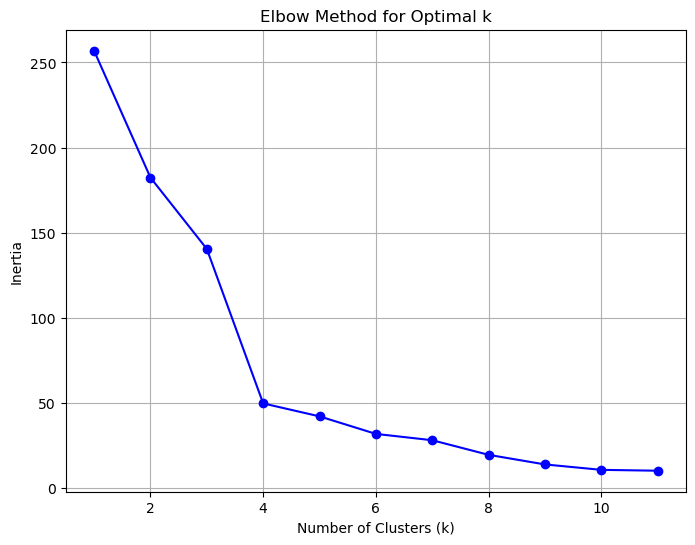

In [115]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(8, 6))
plt.plot(elbow_curve_df['k'], elbow_curve_df['inertia'], marker='o', linestyle='-', color='b')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for `k` is 4 when using PCA data


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ. It is the same value in the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [116]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)


In [117]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [118]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans.predict(pca_df)
# Print the resulting array of cluster values.
cluster_labels

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [119]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['cluster'] = cluster_labels

# Display sample data
pca_df_copy.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [120]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas

pca_df_copy.rename(columns={'PC1': 'PCA1', 'PC2': 'PCA2', 'PC3': 'PCA3'}, inplace=True)
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='cluster',
    colormap='rainbow',
    title='PCA Scatter Plot',
    xlabel='PCA1',
    ylabel='PCA2'
)
scatter_plot

:Scatter   [PCA1]   (PCA2,cluster)

### Determine the Weights of Each Feature on each Principal Component

In [121]:
# Use the columns from the original scaled DataFrame as the index.
# Extract the PCA components (weights) and create a DataFrame
pca_weights = pd.DataFrame(
    pca.components_,
    columns=market_data_normalized.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)
pca_weights

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question:

**Question:** Which features have the strongest positive or negative influence on each component? 

**Answer:**

Strongest Positive and Negative Influences on Each Principal Component:
Principal Component: PC1
	Strongest Positive Influence: price_change_percentage_200d (Value: 0.5945)
	Strongest Negative Influence: price_change_percentage_24h (Value: -0.4167)

Principal Component: PC2
  Strongest Positive Influence: price_change_percentage_30d (Value: 0.5622)
  Strongest Negative Influence: price_change_percentage_1y (Value: -0.1508)

Principal Component: PC3
  Strongest Positive Influence: price_change_percentage_7d (Value: 0.7877)
  Strongest Negative Influence: price_change_percentage_60d (Value: -0.3614)

In [122]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [123]:
strongest_influences = {}
print("Strongest Positive and Negative Influences on Each Principal Component:")
print("="*80)

for pc in pca_weights.index:
    # Get the weights for the current principal component
    weights = pca_weights.loc[pc]

    # Find the feature with the maximum positive weight
    max_feature = weights.idxmax()
    max_value = weights.max()

    # Find the feature with the maximum negative weight
    min_feature = weights.idxmin()
    min_value = weights.min()

     # Print results in an easy-to-read format
    print(f"Principal Component: {pc}")
    print(f"  Strongest Positive Influence: {max_feature} (Value: {max_value:.4f})")
    print(f"  Strongest Negative Influence: {min_feature} (Value: {min_value:.4f})")
    print("-" * 80)

Strongest Positive and Negative Influences on Each Principal Component:
Principal Component: PC1
  Strongest Positive Influence: price_change_percentage_200d (Value: 0.5945)
  Strongest Negative Influence: price_change_percentage_24h (Value: -0.4167)
--------------------------------------------------------------------------------
Principal Component: PC2
  Strongest Positive Influence: price_change_percentage_30d (Value: 0.5622)
  Strongest Negative Influence: price_change_percentage_1y (Value: -0.1508)
--------------------------------------------------------------------------------
Principal Component: PC3
  Strongest Positive Influence: price_change_percentage_7d (Value: 0.7877)
  Strongest Negative Influence: price_change_percentage_60d (Value: -0.3614)
--------------------------------------------------------------------------------
